[**Dr. Kevin M. Moerman**](mailto:kevin.moerman@nuigalway.ie), _Lecturer in Biomedical Engineering_   

National University of Ireland Galway.   

---

\newpage

This is an [Octave](https://www.gnu.org/software/octave/) (an open source alternative to MATLAB) [Jupyter notebook](https://jupyter.org/)

\newpage

# Plasticity

## Introduction
* Plasticity

# The Von Mises stress

$$\sigma_e=\sqrt{\frac{(\sigma_{1}-\sigma_{2})^2+(\sigma_{2}-\sigma_{3})^2+(\sigma_{3}-\sigma_{1})^2}{2}}$$

For 2D $\sigma_3=0$:

$$\sigma_e=\sqrt{\sigma_{1}^2-\sigma_{1}\sigma_{2}+\sigma_{2}^2}$$


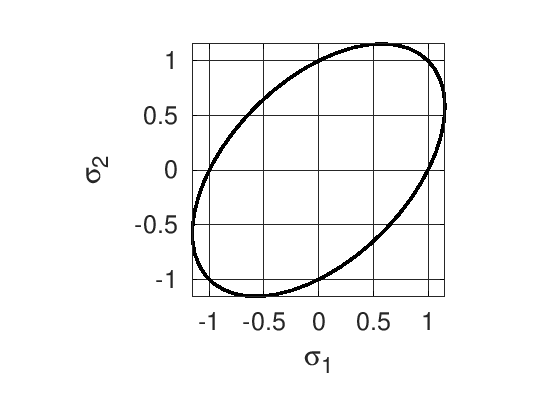

In [97]:
%% Compute ellipsoid

sigma_0=1; %Yield threshold

n=50; %Number of samples to use
t=linspace(0,2*pi,n); %Angular parameter
xc=sqrt(2)*sigma_0*cos(t); %Ellipse x
yc=sqrt(2/3)*sigma_0*sin(t); %Ellipse y
xr=xc*1/sqrt(2)-yc*1/sqrt(2); %Ellipse x rotated
yr=yc*1/sqrt(2)+xc*1/sqrt(2); %Ellipse y rotated

%% Visualise
figure; hold on; %Open figure
xlabel('\sigma_1','FontSize',35); ylabel('\sigma_2','FontSize',35); %Add labels
plot(xr,yr,'k-','LineWidth',10);
axis equal; grid on; box on; axis tight; set(gca,'FontSize',25,'LineWidth',2); %Axis settings

In [98]:
%% Prepare 2D visualization 

%Create a grid for sigma 1 and 2
nPoints=20;
[s1,s2]=meshgrid(linspace(-2*sigma_0,2*sigma_0,nPoints));

%Compute the potential function
theta=(sqrt(s1.^2+(-(s1.*s2))+s2.^2)-sigma_0);

%% Compute gradient to show derivative vectors
ds=(max(s1(:))-min(s1(:)))/nPoints; %step size for gradient as in dx in dy/dx
[ds1,ds2]=gradient(theta,ds,ds); %Compute gradient (derivatives)

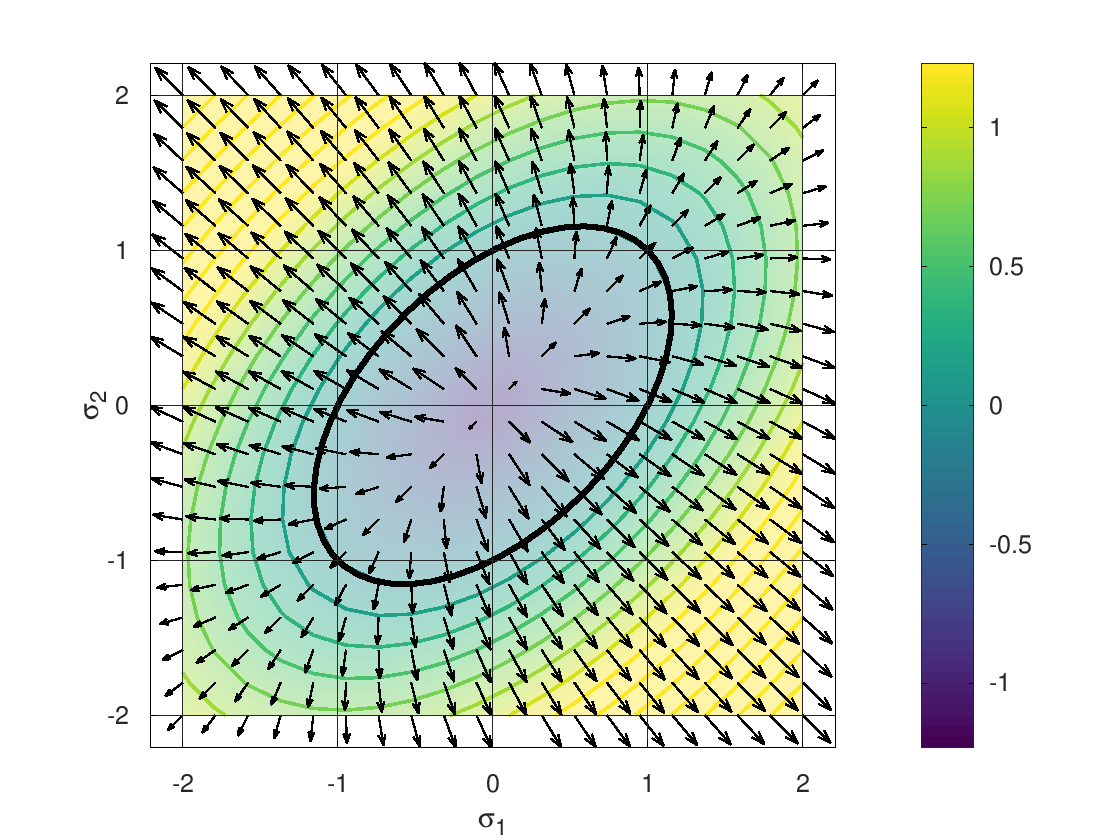

In [99]:
%% Visualize colormapped function, contours, and derivative vectors
hf=figure; hold on; p=get(hf,'Position'); p([3 4])=2*p([3 4]); set(hf,'Position',p); %Open large figure
xlabel('\sigma_1','FontSize',35); ylabel('\sigma_2','FontSize',35); %Add labels
h=pcolor(s1,s2,theta); set(h,'FaceColor','interp','EdgeColor','none','faceAlpha',0.4); %Image surface
[~,hContour]=contour(s1,s2,theta,linspace(0,max(theta(:)),15)); set(hContour,'LineWidth',10); %Contours
hq=quiver(s1,s2,ds1,ds2,'k'); set(hq,'LineWidth',5); %Gradient vectors
plot(xr,yr,'k-','LineWidth',20); %Plot yield line
hc=colorbar; set(hc,'FontSize',25); caxis([-max(abs(theta(:))) max(abs(theta(:)))]/2); %colomap settings
set(gca,'FontSize',25,'LineWidth',2); grid on; box on; axis tight; axis square;  %Axis settings